Pair strategy on DJI top 30, based on cumulative sum on percent change

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
# DJI index list - top 30
tkrs = ['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT', '^DJI']

In [5]:
# read each stock data file containing 3 months of data
stock_data_list = []
for stock in tkrs:
    tmp = pd.read_csv(f'csv/{stock}.csv')
    stock_data_list.append(tmp)
    
stock_data = pd.concat(stock_data_list)
stock_data.head()

,Date,Adj Close,Symbol
0,2020-09-01,133.95,AAPL
1,2020-09-02,131.17,AAPL
2,2020-09-03,120.67,AAPL
3,2020-09-04,120.75,AAPL
4,2020-09-08,112.63,AAPL


In [7]:
# transpose dataframe to have stock symbols appear as columns
stock_data = stock_data.pivot('Date','Symbol')
stock_data.columns = stock_data.columns.droplevel()

stock_data.head()

Symbol,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-01,133.95,249.17,102.04,172.10,145.16,281.25,41.65,81.88,133.55,46.68,...,226.68,114.84,137.42,113.83,311.55,213.03,58.54,36.33,147.59,28645.66
2020-09-02,131.17,256.38,103.97,174.78,148.36,276.69,42.03,81.98,135.39,48.61,...,231.05,116.80,139.73,116.60,318.93,216.15,59.89,36.73,147.68,29100.50
2020-09-03,120.67,246.24,104.03,168.77,145.87,265.01,40.58,81.09,133.24,47.79,...,216.73,112.85,137.50,114.49,314.93,208.65,59.97,36.65,144.54,28292.73
2020-09-04,120.75,246.72,105.23,171.05,147.28,254.70,40.45,80.74,131.99,48.00,...,213.69,112.40,137.20,115.70,310.72,204.35,59.84,36.46,142.83,28133.31
2020-09-08,112.63,239.55,103.24,161.08,147.62,241.27,39.63,77.82,134.20,47.34,...,202.13,112.72,135.19,112.89,305.99,199.82,59.33,35.68,138.45,27500.89


In [9]:
# calculate cumulative sum in order to get details of each stock relaive to percent changes
 
stock1 = '^DJI'
last_distance_from_index = {}
temp_series1 = stock_data[stock1].pct_change().cumsum()
for stock2 in list(stock_data):
    # no need to process itself
    if (stock2 != stock1):
        temp_series2 = stock_data[stock2].pct_change().cumsum() 
        # we are subtracting the stock minus the index, if stock is strong compared
        # to index, we assume a postive value
        diff = list(temp_series2 - temp_series1)
        last_distance_from_index[stock2] = diff[-1]
last_distance_from_index

{'AAPL': -0.1342464048342903,
 'AMGN': -0.143000104175252,
 'AXP': 0.14450387907865092,
 'BA': 0.20343006612482983,
 'CAT': 0.15541870478789732,
 'CRM': -0.15599932288912055,
 'CSCO': 0.001760472163232385,
 'CVX': 0.048175291154541555,
 'DIS': 0.07951923635483871,
 'DOW': 0.107425881766963,
 'GS': 0.08823851658643411,
 'HD': -0.05673102953281761,
 'HON': 0.17234462477967272,
 'IBM': -0.011627455480878623,
 'INTC': -0.06788917240007109,
 'JNJ': -0.07400471668530095,
 'JPM': 0.15218930322316437,
 'KO': 0.033198239983012634,
 'MCD': -0.007506571283849017,
 'MMM': 0.02419733493047771,
 'MRK': -0.07570173198076979,
 'MSFT': -0.08187573266932224,
 'NKE': 0.12989522156701805,
 'PG': -0.025135081336096987,
 'TRV': 0.10347861936299663,
 'UNH': 0.04983203413625026,
 'V': -0.041886408254456664,
 'VZ': -0.005589483032957365,
 'WBA': 0.028991796936264413,
 'WMT': -0.0001204260184635153}

In [10]:
weakest_symbol = min(last_distance_from_index.items(), key=lambda x: x[1]) 
print('Weakest symbol: %s' % weakest_symbol[0])

Weakest symbol: CRM


In [11]:
strongest_symbol = max(last_distance_from_index.items(), key=lambda x: x[1]) 
print('Strongest symbol: %s' % strongest_symbol[0])

Strongest symbol: BA


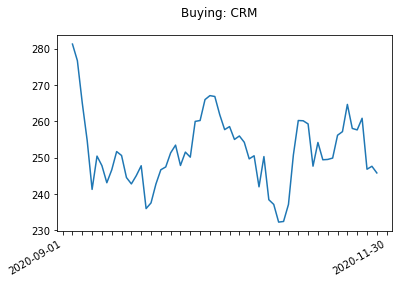

In [13]:
import matplotlib.ticker as mticker
fig, ax = plt.subplots()

ax.plot(temp_series2.index, stock_data[weakest_symbol[0]])
plt.suptitle('Buying: ' + weakest_symbol[0])

# rotate dates 
myLocator = mticker.MultipleLocator(2)
ax.xaxis.set_major_locator(myLocator)
fig.autofmt_xdate()

# fix label to only show first and last date
labels = ['' for item in ax.get_xticklabels()]
labels[1] = temp_series2.index[0]

# labels[int(len(labels)/2)] = temp_series2.index[int(len(labels)/2)]
labels[-2] = temp_series2.index[-1]
ax.set_xticklabels(labels)

plt.show()

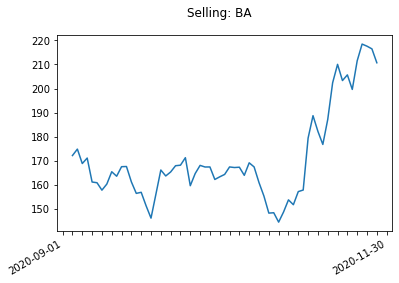

In [14]:
fig, ax = plt.subplots()

ax.plot(temp_series2.index, stock_data[strongest_symbol[0]])
plt.suptitle('Selling: ' + strongest_symbol[0])

# rotate dates 
myLocator = mticker.MultipleLocator(2)
ax.xaxis.set_major_locator(myLocator)
fig.autofmt_xdate()

# fix label to only show first and last date
labels = ['' for item in ax.get_xticklabels()]
labels[1] = temp_series2.index[0]

# labels[int(len(labels)/2)] = temp_series2.index[int(len(labels)/2)]
labels[-2] = temp_series2.index[-1]
ax.set_xticklabels(labels)

plt.show()

Calculate trade sizes

In [15]:
trading_budget = 10000

# get last trading price for both stocks
short_symbol = strongest_symbol[0]
short_last_close = stock_data[strongest_symbol[0]][-1] 
print('Strongest symbol %s, last price: $%f' % (strongest_symbol[0], short_last_close))

long_symbol = weakest_symbol[0]
long_last_close = stock_data[weakest_symbol[0]][-1] 
print('Weakest symbol %s, last price: $%f' % (weakest_symbol[0], long_last_close))

Strongest symbol BA, last price: $210.710000
Weakest symbol CRM, last price: $245.800000


In [16]:
print('For %s, at $%f, you need to short %i shares' %
      (short_symbol, short_last_close, (trading_budget * 0.5) / short_last_close ))

For BA, at $210.710000, you need to short 23 shares


In [17]:
print('For %s, at $%f, you need to buy %i shares' %
      (long_symbol, long_last_close, (trading_budget * 0.5) / long_last_close ))

For CRM, at $245.800000, you need to buy 20 shares


Let's plot the pair trade and index data

In [18]:
long_trade_df = stock_data[long_symbol].pct_change().cumsum()
short_trade_df = stock_data[short_symbol].pct_change().cumsum()
index_df = stock_data['^DJI'].pct_change().cumsum()

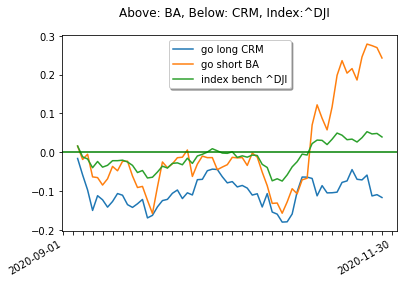

In [21]:
fig, ax = plt.subplots()


ax.plot(long_trade_df.index, long_trade_df, label='go long ' + long_symbol)
ax.plot(long_trade_df.index, short_trade_df, label='go short ' + short_symbol)
ax.plot(long_trade_df.index, index_df, label='index bench ' + tkrs[-1])
legend = ax.legend(loc='upper center', shadow=True)

plt.suptitle('Above: ' + short_symbol + ', Below: ' + long_symbol + ', Index:' + tkrs[-1])

# add zero line 
ax.axhline(y=0, color='green', linestyle='-')

# rotate dates 
myLocator = mticker.MultipleLocator(2)
ax.xaxis.set_major_locator(myLocator)
fig.autofmt_xdate()

# fix label to only show first and last date
labels = ['' for item in ax.get_xticklabels()]
labels[1] = temp_series2.index[0]

# labels[int(len(labels)/2)] = temp_series2.index[int(len(labels)/2)]
labels[-2] = temp_series2.index[-1]
ax.set_xticklabels(labels)

plt.show()